# Building a product review sentimenteal analysis for Flipkart

In [45]:
import pandas as pd
product_review = pd.read_csv('reviews_badminton.csv')

product_review.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


## Step 1: Exploratory Data Analysis
Performed to gain thorough understanding of the components of the data

In [46]:
product_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [47]:
product_review.isna().sum().sort_values(ascending = False)

Month              465
Place of Review     50
Reviewer Name       10
Review Title        10
Up Votes            10
Down Votes          10
Review text          8
Ratings              0
dtype: int64

In [48]:
product_review.describe()

,Up Votes,Down Votes,Ratings
count,8508.000000,8508.000000,8518.000000
mean,0.391396,0.121768,4.181028
std,11.613909,3.248022,1.262200
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,889.000000,219.000000,5.000000


## Feature selection


This refers to selecting revelant columns for our machine learning algorithm to train on. The objective here is to classify a user review as either positive, or negative. To that effect the following columns are of relevance:
- Review Text
- Ratings (from which the Label column would be created) 

In [49]:
product_review.loc[:,'Label'] = product_review['Ratings'].apply(lambda x: 'Negative' if x <= 3 else 'Positive')
product_review.head(10)

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Label
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,Positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,Negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,Negative
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3,Negative
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Negative
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5,Positive
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5,Positive
7,Flipkart Customer,Classy product,"Certified Buyer, Panjim",59.0,13.0,Oct 2018,Good quality original shuttles.READ MORE,5,Positive
8,Jafar Qureshi,Great product,"Certified Buyer, Sheopur",14.0,1.0,Aug 2018,AwesomeREAD MORE,5,Positive
9,Bheemesh,Just wow!,"Certified Buyer, Kurnool",50.0,12.0,May 2018,nice original productsREAD MORE,5,Positive


In [50]:
product_review.shape

(8518, 9)

In [51]:
reviews = product_review[['Review text', 'Label']]
reviews

,Review text,Label
0,"Nice product, good quality, but price is now r...",Positive
1,They didn't supplied Yonex Mavis 350. Outside ...,Negative
2,Worst product. Damaged shuttlecocks packed in ...,Negative
3,"Quite O. K. , but nowadays the quality of the...",Negative
4,Over pricedJust â?¹620 ..from retailer.I didn'...,Negative
...,...,...
8513,NaN,Positive
8514,NaN,Negative
8515,NaN,Positive
8516,NaN,Negative


In [52]:
reviews.dropna(subset=['Review text'], inplace=True)
reviews.isna().sum().sort_values(ascending = False)

Review text    0
Label          0
dtype: int64

In [53]:
reviews.shape

(8510, 2)

In [54]:
reviews['Review text'].head(20)

0     Nice product, good quality, but price is now r...
1     They didn't supplied Yonex Mavis 350. Outside ...
2     Worst product. Damaged shuttlecocks packed in ...
3     Quite O. K. , but nowadays  the quality of the...
4     Over pricedJust â?¹620 ..from retailer.I didn'...
5     Good quality product. Delivered on time.READ MORE
6     BEST PURCHASE It is a good quality and is more...
7              Good quality original shuttles.READ MORE
8                                      AwesomeREAD MORE
9                       nice original productsREAD MORE
10    This GREEN CAP SHUTTLECOCK is really AWESOME. ...
11                           Best in class....READ MORE
12    it's genuine and price is less than our near b...
13    This is the second time i am getting an opened...
14    really satisfied with the quality and the prom...
15                                         NycREAD MORE
16    I usually buy them the same model but this did...
17                  Poor quality, not originalRE

We can observe the occurrence of 'READ MORE'. In context of review data 'READ MORE' is irrelevant as logically it refers to a hyperlink to click on for more information. For this analysis, 'READ MORE' is an outlier and will be removed.

In [55]:
reviews.loc[0, 'Review text']

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE'

In [56]:
reviews.loc[5, 'Review text']

'Good quality product. Delivered on time.READ MORE'

Let's have a view of common words in our review text data.

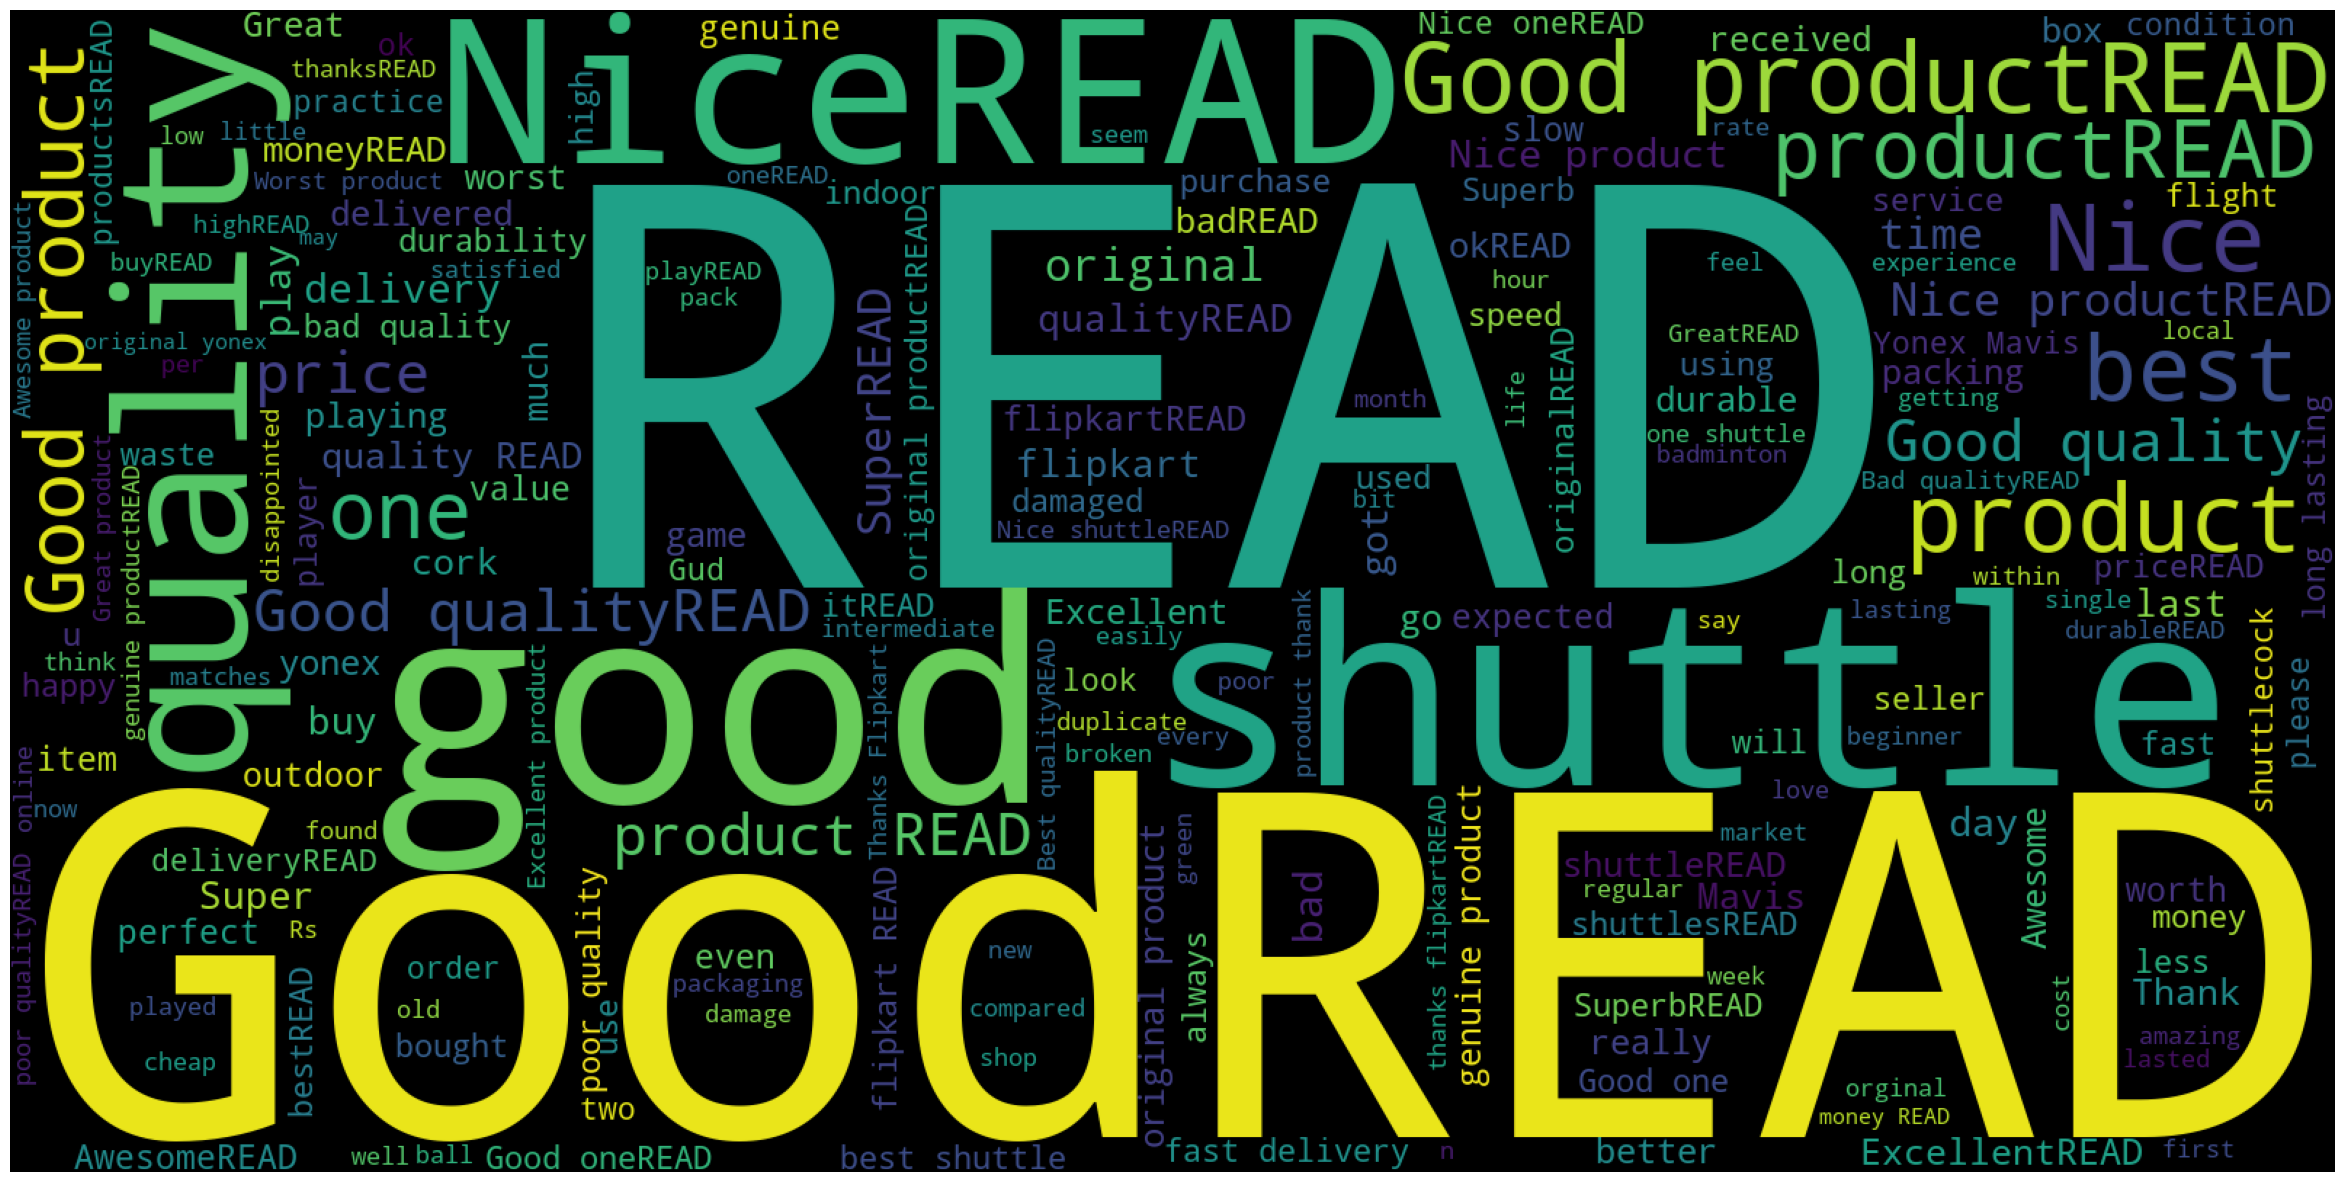

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

reviews['Review text'] = reviews['Review text'].astype(str)

from wordcloud import WordCloud

wc = WordCloud(background_color = 'black',
              width=1600,
              height=800).generate(' '.join(reviews['Review text']))

plt.figure(1, figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

Label
Positive    0.801763
Negative    0.198237
Name: proportion, dtype: float64


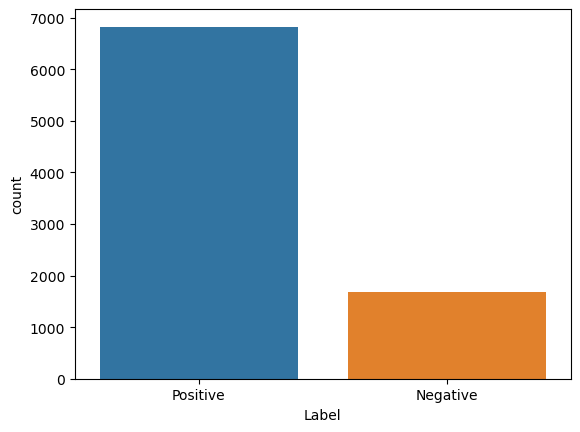

In [58]:
# distribution of our target variable

print(reviews['Label'].value_counts(normalize=True))

sns.countplot(x='Label', data = reviews)
plt.show()

# Step 2: Identify the input(X) and output(y)

In [59]:
#renaming the Review text column
reviews = reviews.rename(columns={'Review text': 'Review_text'})

X = reviews.Review_text #this column contains textual data to extract reviews from 
y = reviews.Label #this is the column we are learning to predict

print(X.shape, y.shape)

(8510,) (8510,)


In [60]:
reviews

,Review_text,Label
0,"Nice product, good quality, but price is now r...",Positive
1,They didn't supplied Yonex Mavis 350. Outside ...,Negative
2,Worst product. Damaged shuttlecocks packed in ...,Negative
3,"Quite O. K. , but nowadays the quality of the...",Negative
4,Over pricedJust â?¹620 ..from retailer.I didn'...,Negative
...,...,...
8505,Delivered before time but price is high from m...,Negative
8506,up to the mark but same is available in market...,Positive
8507,Nice delivery speedREAD MORE,Positive
8508,No complaints about the item . Its the best on...,Positive


# Step 3: Data Preparation - Split the data into train and test set

In [61]:
# splitting into train and test

from sklearn.model_selection import train_test_split

#splitting the data into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

#random_state is used to ensure that data splitting process is reproducible. 
#that is, no matter how many times the code is run, you will get the same split of data each time

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(6808,) (1702,)
(6808,) (1702,)


# Step 4: Data preprocessing on train data(X_train)

In [62]:
# importing libaries
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [63]:
#intializing the lemmatizer object
lemmatizer = WordNetLemmatizer()

In [64]:
def clean(doc): # doc is a string of text
    
    # removing outlier strings
    doc = doc.replace("READ MORE", " ")
    
    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()
    
    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    
    # Join and return
    return " ".join(filtered_tokens)

In [65]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

#the numerical feature extraction method performed here is Bag of Words represneted by CountVectorizer in sklearn

# instantiate a vectorizer
vect = CountVectorizer(preprocessor=clean)

# use it to extract features from training data
%time X_train_num = vect.fit_transform(X_train)

print(X_train_num.shape)

CPU times: total: 1.95 s
Wall time: 1.99 s
(6808, 2541)


# Step 5: Data preprocessing on test data(X_test)

In [66]:
# transform testing data (using training data's features)
X_test_num = vect.transform(X_test)

print(X_test_num.shape)

(1702, 2541)


# Step 6: Training the model

## 1. Logistic Regression

In [67]:
#a. feeding the train data into the logistic regression algorithm

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_num, y_train)

LogisticRegression()

In [68]:
#b. now, predict the values of y using the x_train
y_train_pred = classifier.predict(X_train_num)

In [69]:
#c. predicting the values of y using the x_test data
y_test_pred = classifier.predict(X_test_num)

Evaluating on Train Data

In [70]:
from sklearn.metrics import accuracy_score, classification_report

train_acc_score = accuracy_score(y_train, y_train_pred)

print(classification_report(y_train, y_train_pred))

print('train_acc_score:',train_acc_score)

              precision    recall  f1-score   support

    Negative       0.92      0.60      0.73      1350
    Positive       0.91      0.99      0.95      5458

    accuracy                           0.91      6808
   macro avg       0.91      0.79      0.84      6808
weighted avg       0.91      0.91      0.90      6808

train_acc_score: 0.9103995299647474


Evaluating on Test Data

In [71]:
from sklearn.metrics import accuracy_score, classification_report

test_acc_score = accuracy_score(y_test, y_test_pred)

print(classification_report(y_test, y_test_pred))

print('test_acc_score:',test_acc_score)

              precision    recall  f1-score   support

    Negative       0.83      0.47      0.60       337
    Positive       0.88      0.98      0.93      1365

    accuracy                           0.88      1702
   macro avg       0.86      0.72      0.76      1702
weighted avg       0.87      0.88      0.86      1702

test_acc_score: 0.8766157461809636


From this results it is observed that though the model had learned enough during the training phase, it however failed to generalize as expected on unseen data. Let's see the results with a different algorithm.

## 2. Random Forest

In [72]:
#a. feeding the train data into the random forest algorithm

from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier()
classifier2.fit(X_train_num, y_train)

RandomForestClassifier()

In [73]:
#b. now, predict the values of y using the x_train

y_train_pred = classifier2.predict(X_train_num)

In [74]:
#c. predicting the values of y using the x_test data

y_test_pred = classifier2.predict(X_test_num)

Evaluating on Train Data

In [75]:
from sklearn.metrics import accuracy_score, classification_report

train_acc_score2 = accuracy_score(y_train, y_train_pred)

print(classification_report(y_train, y_train_pred))

print('train_acc_score2:',train_acc_score2)

              precision    recall  f1-score   support

    Negative       0.97      0.78      0.86      1350
    Positive       0.95      0.99      0.97      5458

    accuracy                           0.95      6808
   macro avg       0.96      0.88      0.92      6808
weighted avg       0.95      0.95      0.95      6808

train_acc_score2: 0.950352526439483


Evaluating on Test Data

In [76]:
from sklearn.metrics import accuracy_score, classification_report

test_acc_score2 = accuracy_score(y_test, y_test_pred)

print(classification_report(y_test, y_test_pred))

print('test_acc_score2:',test_acc_score2)

              precision    recall  f1-score   support

    Negative       0.75      0.54      0.63       337
    Positive       0.89      0.95      0.92      1365

    accuracy                           0.87      1702
   macro avg       0.82      0.75      0.77      1702
weighted avg       0.86      0.87      0.86      1702

test_acc_score2: 0.872502937720329


We get similar results as in the above where the test acuuracy score is lower than the train score. Let's look one more time at the results the using naive bayes algorithm.

## 3. Naive Bayes

In [77]:
from sklearn.naive_bayes import MultinomialNB
classifier3= MultinomialNB()
classifier3.fit(X_train_num,y_train)

MultinomialNB()

In [78]:
#predict the values of y using the x_train

y_train_pred = classifier3.predict(X_train_num)

In [79]:
#predicting the values of y using the x_test data

y_test_pred = classifier2.predict(X_test_num)

Evaluation of the train and test data using Confusion matrix

In [80]:
from sklearn.metrics import confusion_matrix
import numpy as np

confusion_matrix(y_train, y_train_pred)

array([[ 817,  533],
       [ 118, 5340]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

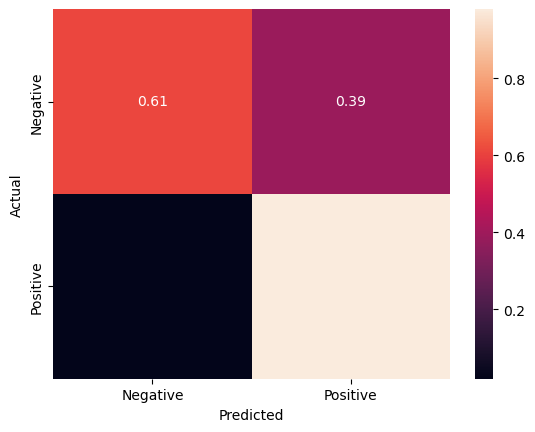

In [81]:
cm = confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=classifier3.classes_, yticklabels=classifier3.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 23.52222222222222, 'Predicted')

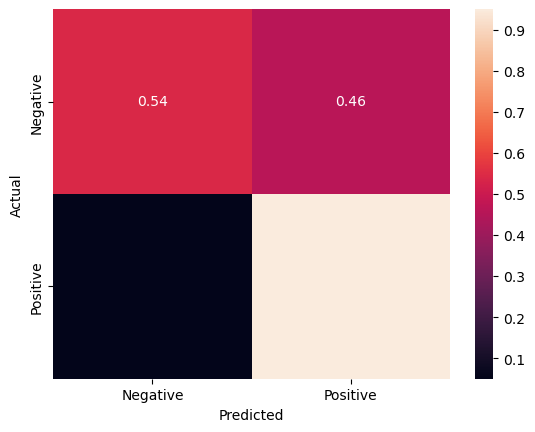

In [82]:
cm = confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=classifier3.classes_, yticklabels=classifier3.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

## Creating an Optimal Workflow
### Implementing various Algorithms to find the Best Model

In [83]:
# importing libraries

from joblib import Memory
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from gensim.models import Word2Vec
from sklearn.metrics import f1_score

In [84]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
# 1. Defining a memory object to cache Intermediate results

cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# 2. Defining the pipleine for data preprocessing and model building
pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

#3. Defining a parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1500, 2000, 2500], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
        'vectorization': [CountVectorizer(),TfidfVectorizer()],
            'vectorization__max_features' : [1500, 2000, 2500],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1500, 2000, 2500], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

#4. Perform GridSearchCV for each algorithm

best_models = {}

for algo in pipelines.keys():
    print("*" * 10, algo, "*" * 10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1',  
                               return_train_score=True,
                               verbose=1)
    
    %time grid_search.fit(X_train, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    f1 = f1_score(y_test, y_pred, pos_label='Positive')  
    print('F1 Score on Test Data:', f1)


********** naive_bayes **********
Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 3.86 s
Wall time: 4.1 s
F1 Score on Test Data: 0.9359570661896244
********** decision_tree **********
Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: total: 25.5 s
Wall time: 26.8 s
F1 Score on Test Data: 0.9183895538628944
********** logistic_regression **********
Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: total: 7min 8s
Wall time: 7min 29s
F1 Score on Test Data: 0.935352789065386


In [86]:
#now we want to see the best models from each algorithn in the hyper parameter tuning process above

for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1500)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1500)),
                ('classifier', DecisionTreeClassifier())])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1500)),
                ('classifier',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    l1_ratio=0.4, penalty='elasticnet',
                                    solver='saga'))])



In [87]:
#next, we save the model (this is known as Serialization) so it can bse used to serve user request later on

import joblib
import os

from sklearn.metrics import f1_score

save_dir = 'Predictive_Model'

#to check if the directory exists, if not create it
if not os.path.exists(save_dir):
    os.makedirs(save_dir)



for name, model in best_models.items():
    print("*" * 10, name, "*" * 10)
    
    joblib.dump(model, os.path.join(save_dir, f'{name}.pkl'))
    loaded_model = joblib.load(os.path.join(save_dir, f'{name}.pkl'))
    
    %time y_test_pred = loaded_model.predict(X_test)

    f1 = f1_score(y_test, y_test_pred, pos_label='Positive')

    print("F1 Score (Positive Class):", f1)
    print("Model Size:", os.path.getsize(os.path.join(save_dir, f'{name}.pkl')), "Bytes")

********** naive_bayes **********
CPU times: total: 15.6 ms
Wall time: 26 ms
F1 Score (Positive Class): 0.9359570661896244
Model Size: 111670 Bytes
********** decision_tree **********
CPU times: total: 46.9 ms
Wall time: 27 ms
F1 Score (Positive Class): 0.9183895538628944
Model Size: 199432 Bytes
********** logistic_regression **********
CPU times: total: 15.6 ms
Wall time: 19 ms
F1 Score (Positive Class): 0.935352789065386
Model Size: 75897 Bytes
